### 1. Import Required Libraries and Data

In [26]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath('../src'))  # Adjust the path to point to the src directory
import eda_utils as eda  # Import your custom EDA functions

# Set a global theme and color palette for all visuals
plt.style.use('dark_background')  # Global dark theme for matplotlib
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
sns.set_palette(custom_palette)  # Apply the custom palette globally

In [27]:
data = pd.read_csv('../data/raw/TELCO-Data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Dataset Information

The Telco customer churn dataset contains information about a telecom company providing home phone and Internet services to 7043 customers in California. It includes details about customer churn, services, and demographics.

**Dataset Overview:**
- **Observations:** 7043
- **Variables:** 21

**Key Variables:**
- **customerID:** Unique customer identifier
- **gender:** Gender of the customer
- **SeniorCitizen:** Indicates if the customer is a senior citizen (1 = Yes, 0 = No)
- **Partner:** Whether the customer has a partner (Yes/No)
- **Dependents:** Whether the customer has dependents (Yes/No)
- **tenure:** Number of months the customer has stayed with the company
- **PhoneService:** Whether the customer has phone service (Yes/No)
- **MultipleLines:** Whether the customer has multiple lines (Yes/No/No phone service)
- **InternetService:** Type of internet service (DSL/Fiber optic/No)
- **OnlineSecurity:** Whether the customer has online security (Yes/No/No internet service)
- **OnlineBackup:** Whether the customer has online backup (Yes/No/No internet service)
- **DeviceProtection:** Whether the customer has device protection (Yes/No/No internet service)
- **TechSupport:** Whether the customer has technical support (Yes/No/No internet service)
- **StreamingTV:** Whether the customer has streaming TV (Yes/No/No internet service)
- **StreamingMovies:** Whether the customer has streaming movies (Yes/No/No internet service)
- **Contract:** Type of contract (Month-to-month/One year/Two years)
- **PaperlessBilling:** Whether the customer uses paperless billing (Yes/No)
- **PaymentMethod:** Payment method (Electronic check/Mailed check/Bank transfer/Credit card)
- **MonthlyCharges:** Monthly charges for the customer
- **TotalCharges:** Total charges for the customer
- **Churn:** Whether the customer churned (Yes/No)

**Categories of Information:**
1. **Services:** Phone, internet, online security, backup, device protection, technical support, streaming TV/movies.
2. **Account Info:** Tenure, contract type, payment method, billing type, charges.
3. **Demographics:** Gender, senior citizen status, partner, dependents.


### 2. Data Preprocessing

#### 2.1 Initial Checks

In [28]:
data.shape

(7043, 21)

In [29]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


#### 2.2 Drop/Alter Necessary Rows and Columns

In [31]:
# Customer ID is not needed for analysis
data.drop(columns=['customerID'], inplace=True)

It is worth noting that ***Total Charges*** is currently incorrectly stored as data type object, this needs to be altered to a float and check the empty values

In [32]:
# Convert to numeric with errors='coerce'
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check if null values are important, e.g., if they are not random
data[data['TotalCharges'].isnull()]

# Random Null values, total of 11. Drop rows with null values in 'TotalCharges'
data.dropna(subset=['TotalCharges'], inplace=True)

Given the low number of Null values (11) it seems unnecessary to impute, so dropping is best course of action

#### 2.3 Check values in each column and format columns

In [33]:
for column in data.columns:
    print(f"Value counts for {column}:")
    if data[column].nunique() < 5:
        print(data[column].value_counts())
    else:
        print(data[column].value_counts().head(5))  # Print top 5 for reference
    print("\n")

Value counts for gender:
gender
Male      3549
Female    3483
Name: count, dtype: int64


Value counts for SeniorCitizen:
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64


Value counts for Partner:
Partner
No     3639
Yes    3393
Name: count, dtype: int64


Value counts for Dependents:
Dependents
No     4933
Yes    2099
Name: count, dtype: int64


Value counts for tenure:
tenure
1     613
72    362
2     238
3     200
4     176
Name: count, dtype: int64


Value counts for PhoneService:
PhoneService
Yes    6352
No      680
Name: count, dtype: int64


Value counts for MultipleLines:
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


Value counts for InternetService:
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


Value counts for OnlineSecurity:
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, 

From the above, there are not categorical values that have strange entries or spelling errors causing the labels to be inaccurate or causing grouping issues.

In [34]:
# Change the data type of 'SeniorCitizen' to categorical 
# to align with others for future encoding
data["SeniorCitizen"] = data["SeniorCitizen"].astype("O")

In [35]:
# Convert 'Churn' to binary values (0 and 1) - Target variable
data["Churn"] = data["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [36]:
data['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

#### 2.4 Check for Duplicates

In [37]:
print('Number of duplicated values in training dataset: ', data.duplicated().sum())

Number of duplicated values in training dataset:  22


Given these values are duplicates but are duplicates based off of the features, it would imply these are still valid records and worth keeping to improve model accuracy

In [38]:
# Updated data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

#### 2.5 Creating Categorical and Numeric Lists

In [39]:
# distinction is based on the number of different values in the column
# The threshold is arbitrary and can be adjusted based on the dataset
# For this example, we will use 6 as the threshold for numeric vs categorical distinction
columns = list(data.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(data[i].unique()) > 6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = [col for col in categoric_columns if col != 'Churn']

print('Numerical fetures: ',numeric_columns)
print('Categorical fetures: ',categoric_columns)

Numerical fetures:  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical fetures:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


#### 2.6 Visualizing Churn Distribution

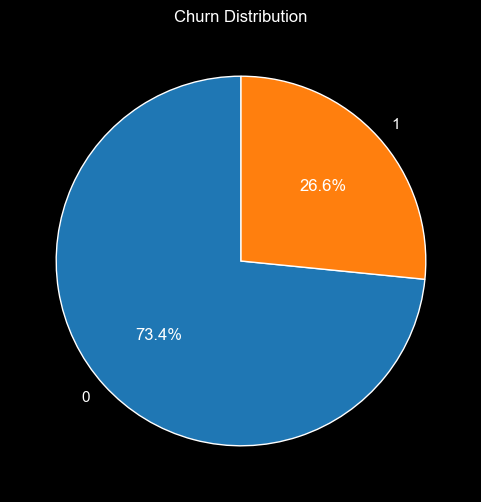

In [40]:
# Create a pie chart to show the distribution of the 'Churn' column with a dark theme
plt.style.use('dark_background')
churn_counts = data['Churn'].value_counts()
labels = churn_counts.index  # Dynamically generate labels based on unique values
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
plt.title('Churn Distribution', color='white')
plt.show()

The dataset is unbalanced in a near about 3 : 1 ratio for Not-Churn : Churn customers

Due to this, predictions will be biased towards Not-Churn customers.

Visualisations will also display this bias!

### 3. EDA

#### 2.7 Exploratory Data Analysis (EDA)

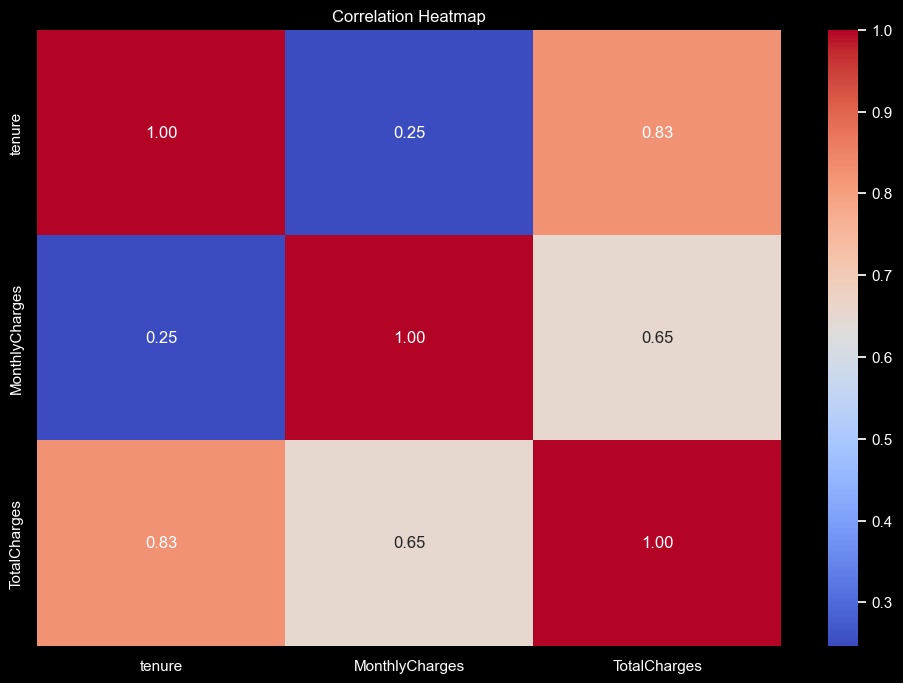

In [41]:
# Run the EDA function on the Telco dataset
# 1. Correlation Heatmap
eda.plot_correlation_heatmap(data, numeric_columns)

TotalCharges and tenure have high correlation. Understood given that total charges will likely rise in line with the customers tenure

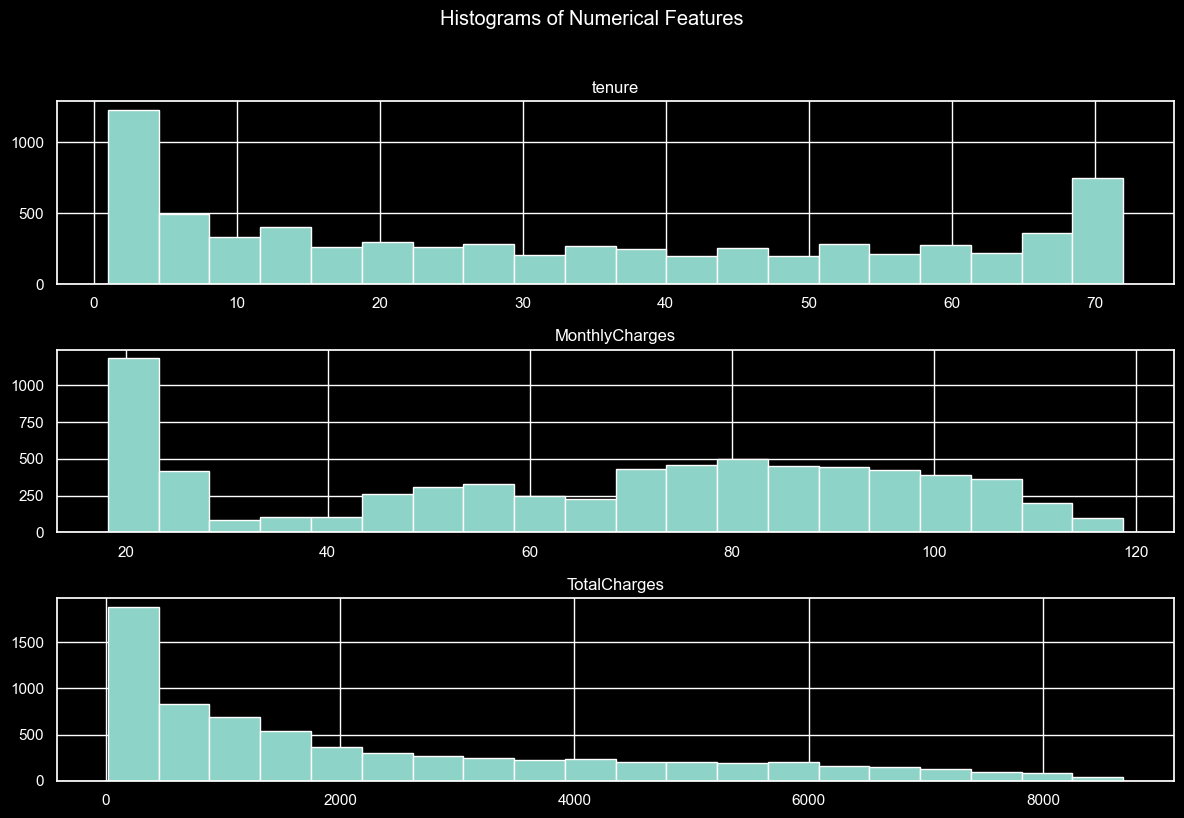

In [42]:
# 2. Histograms
eda.plot_histograms(data, numeric_columns)

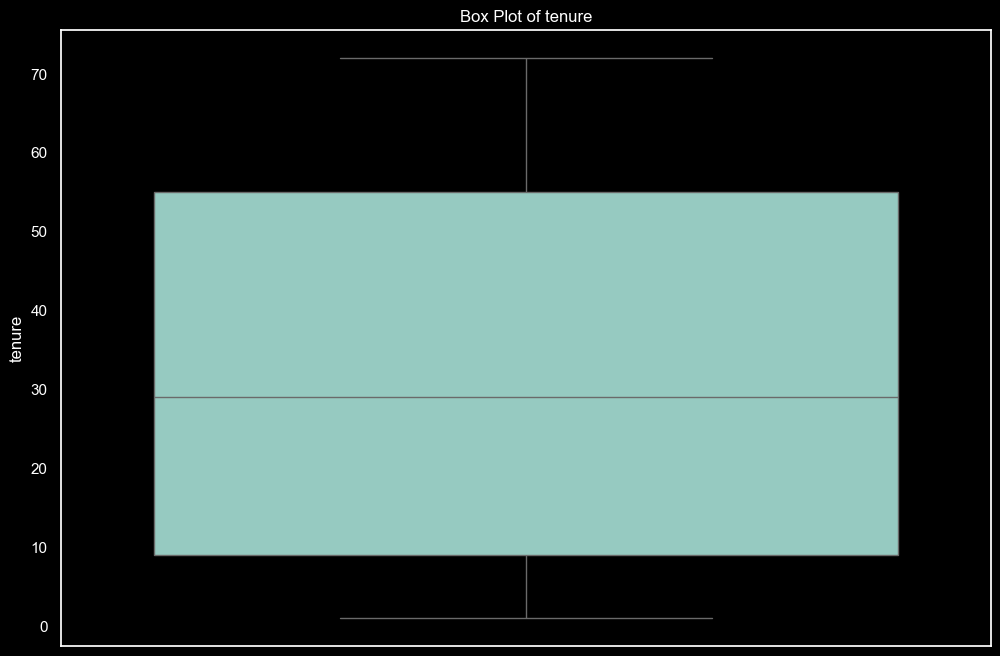

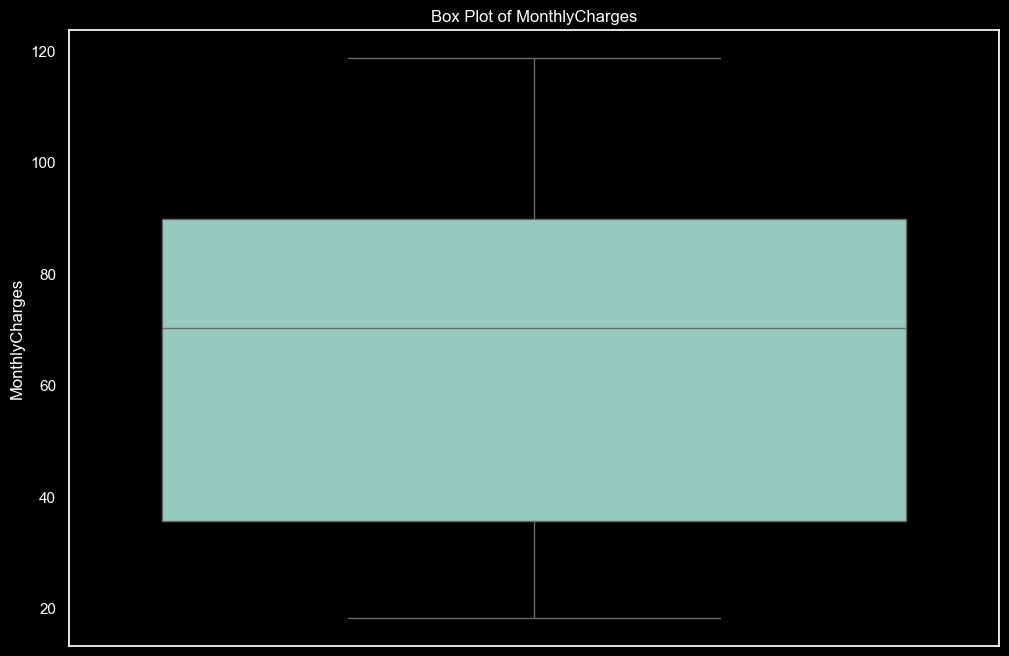

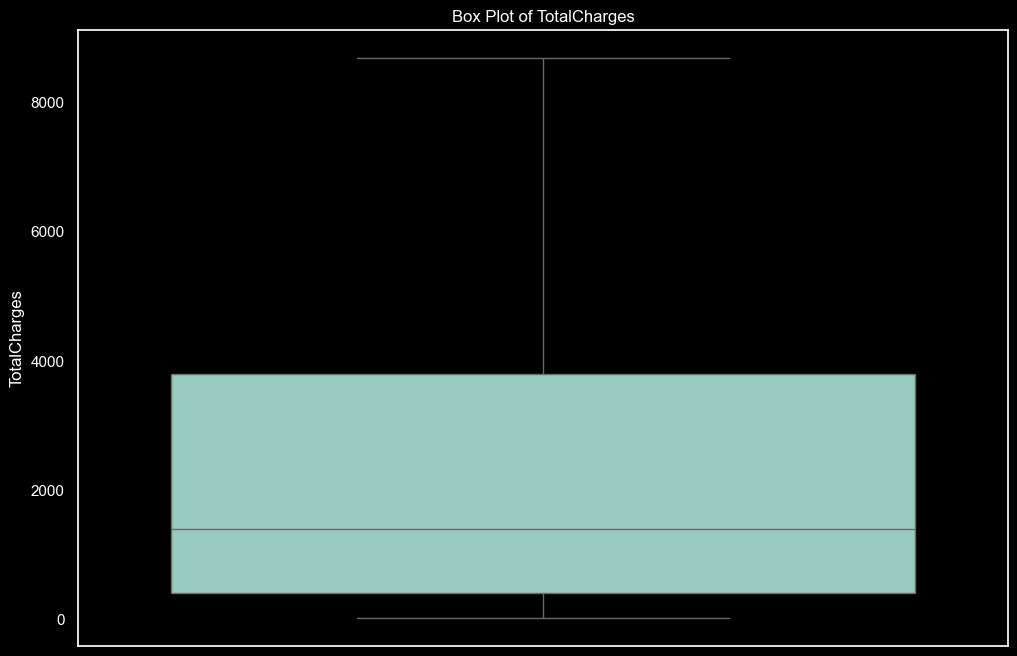

In [43]:
# 3. Box Plots
eda.plot_box_plots(data, numeric_columns)

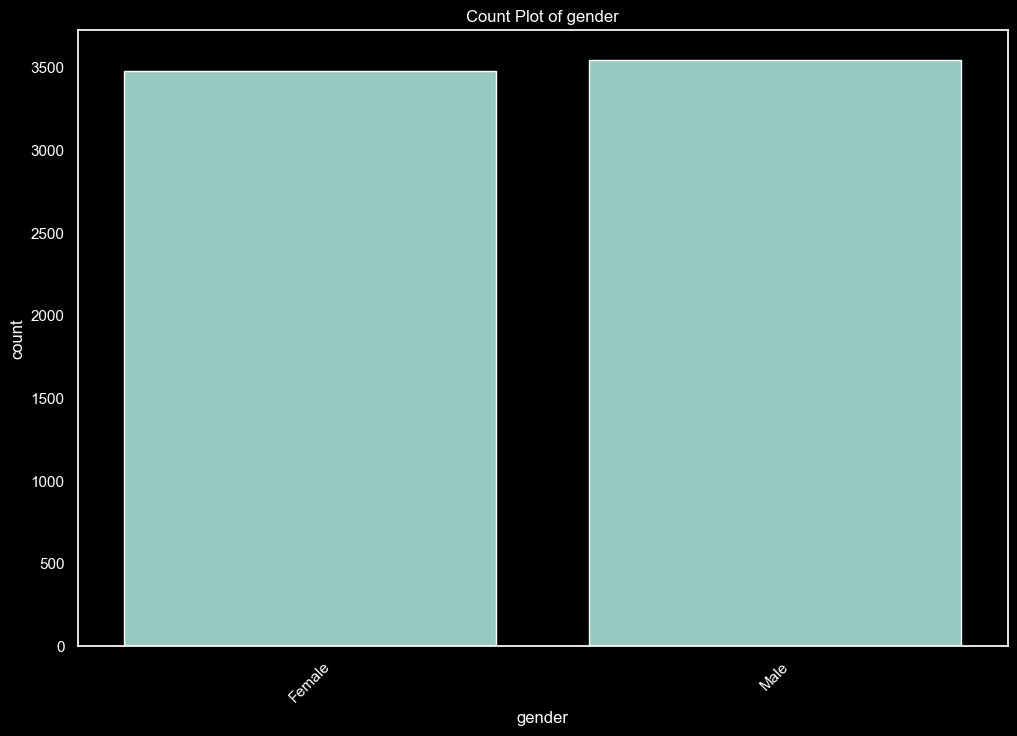

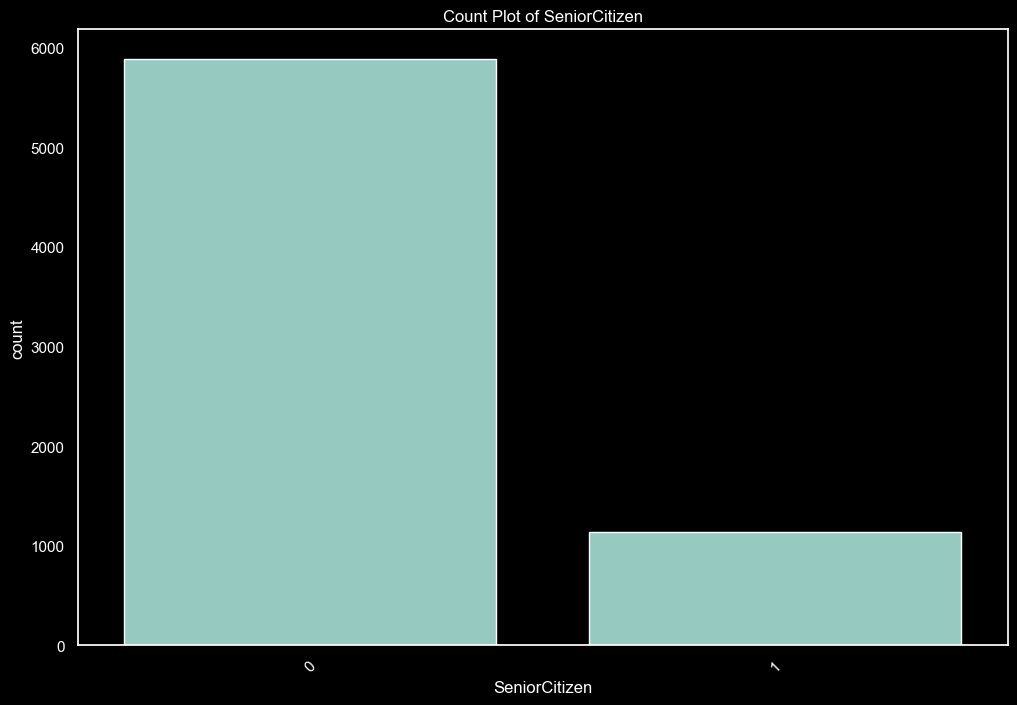

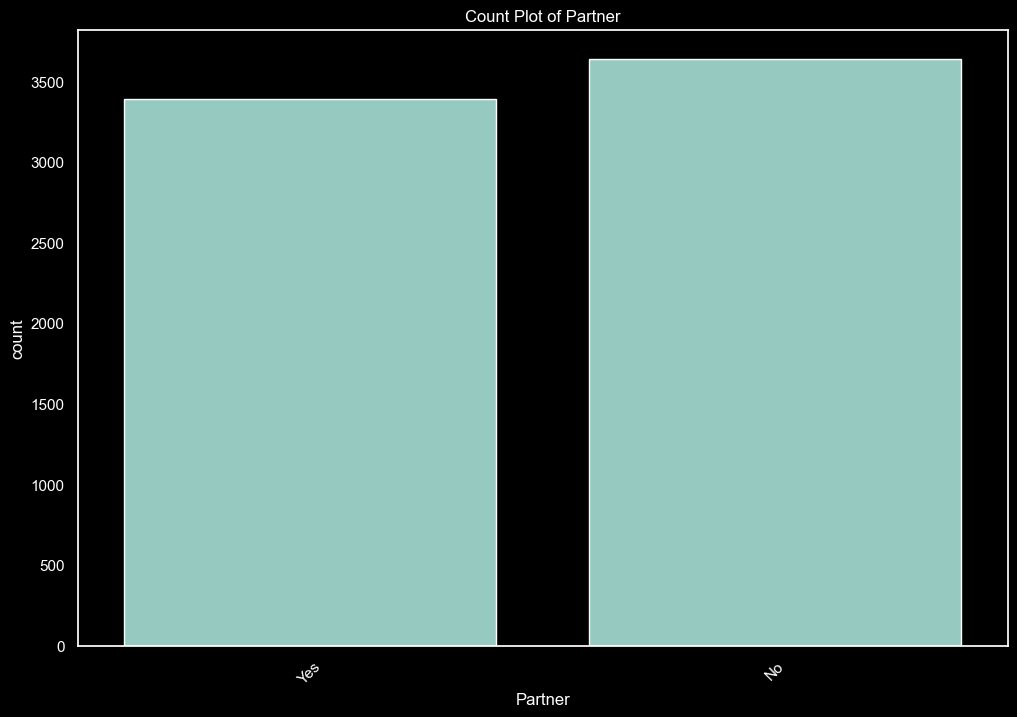

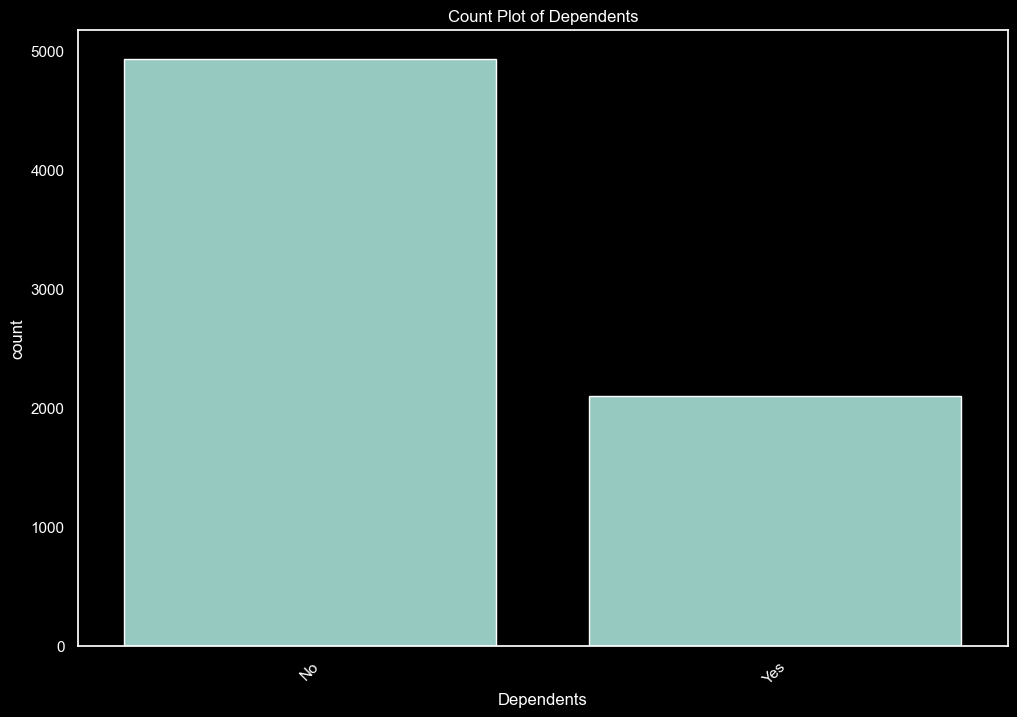

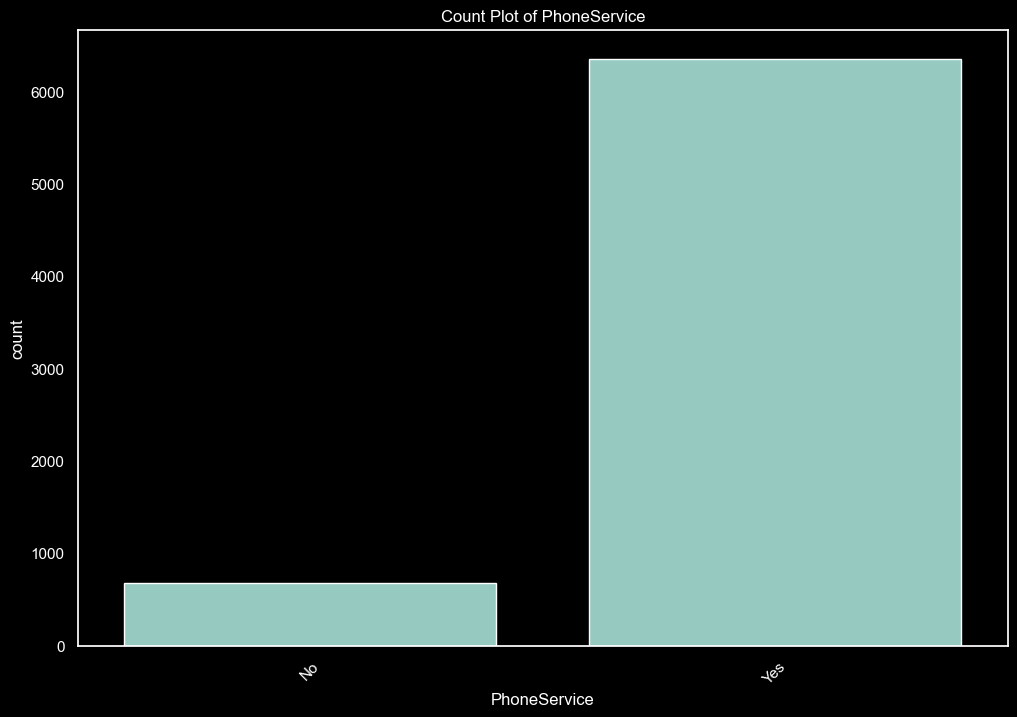

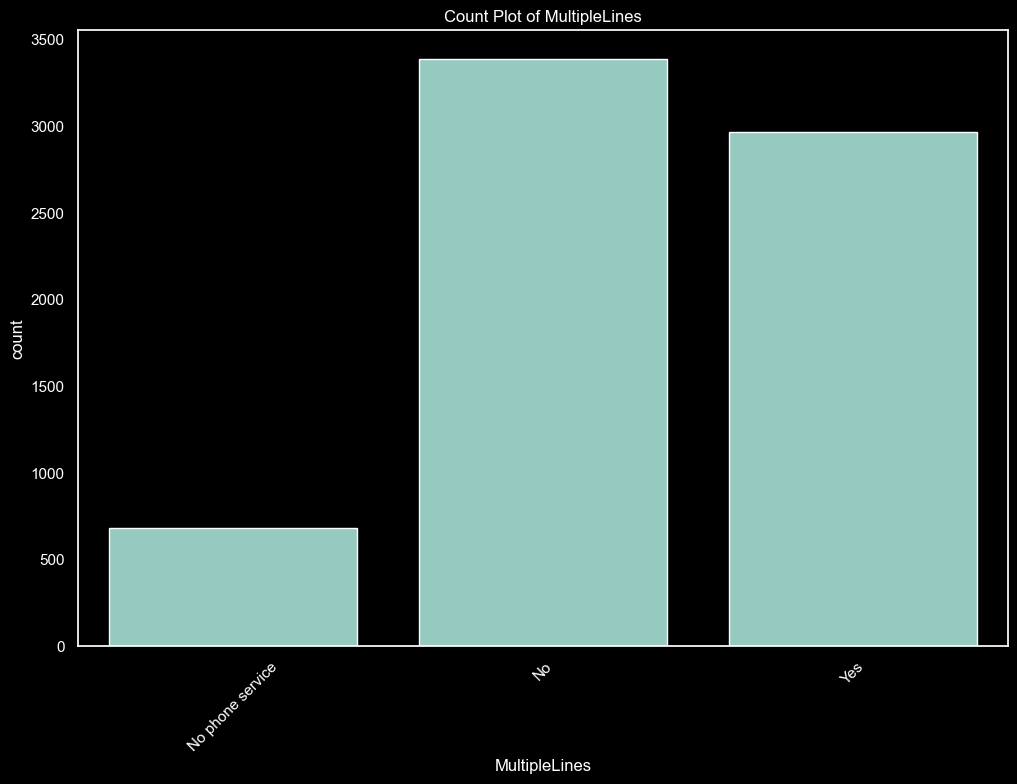

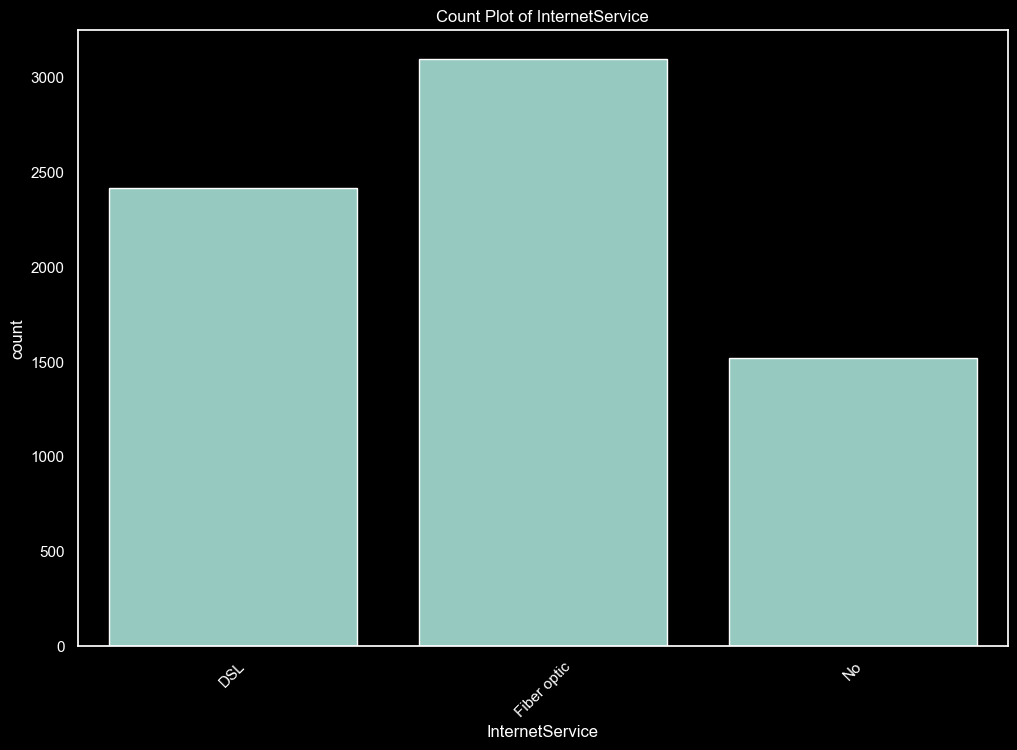

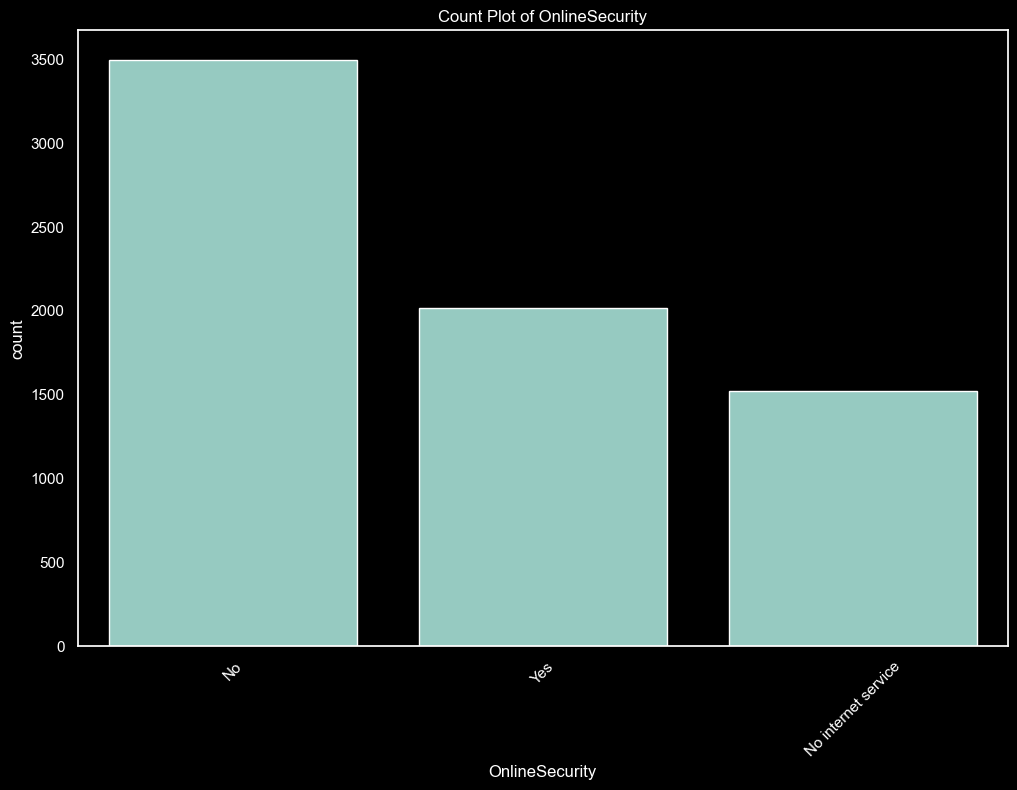

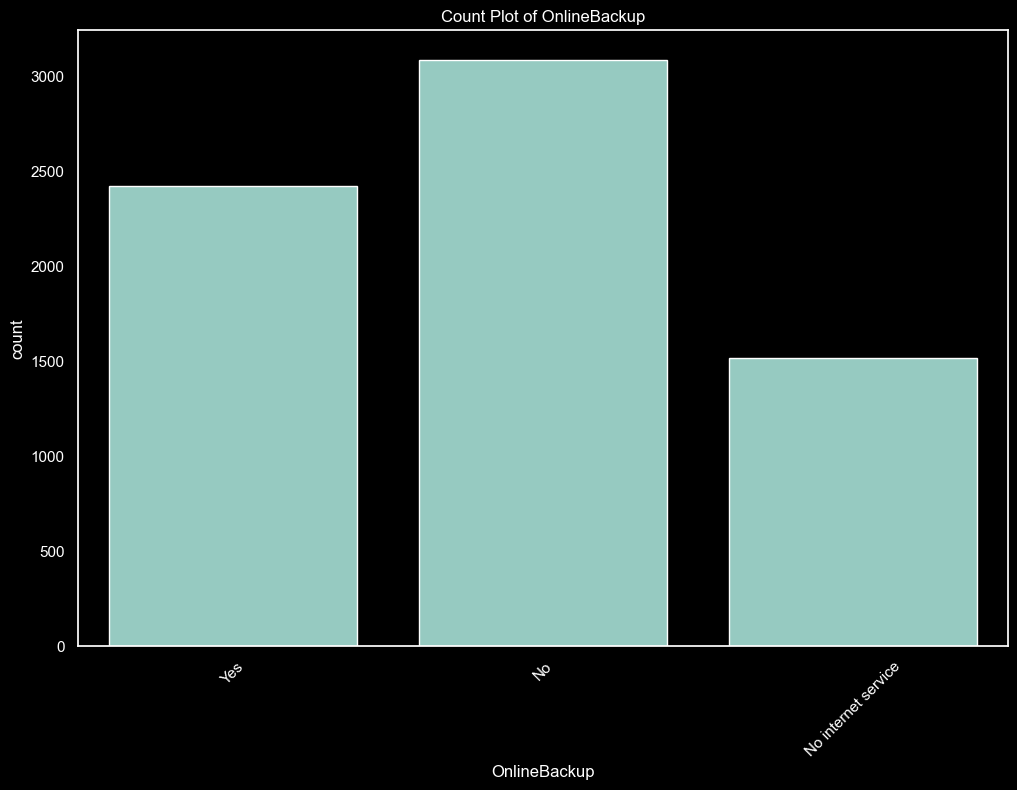

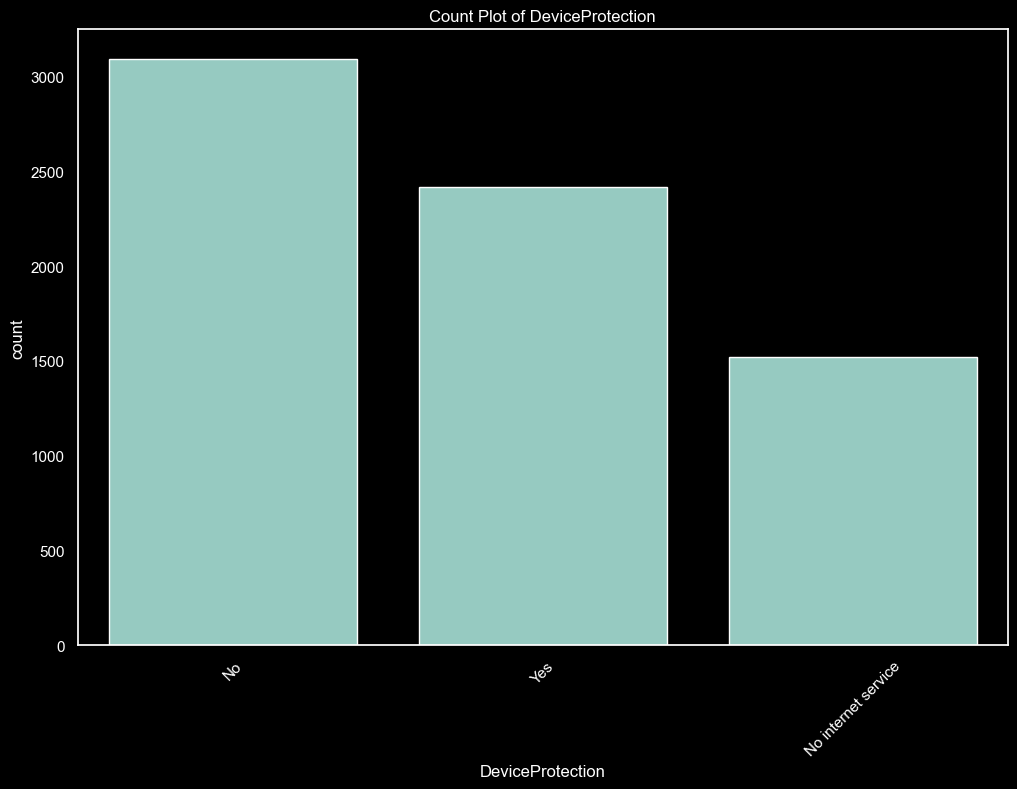

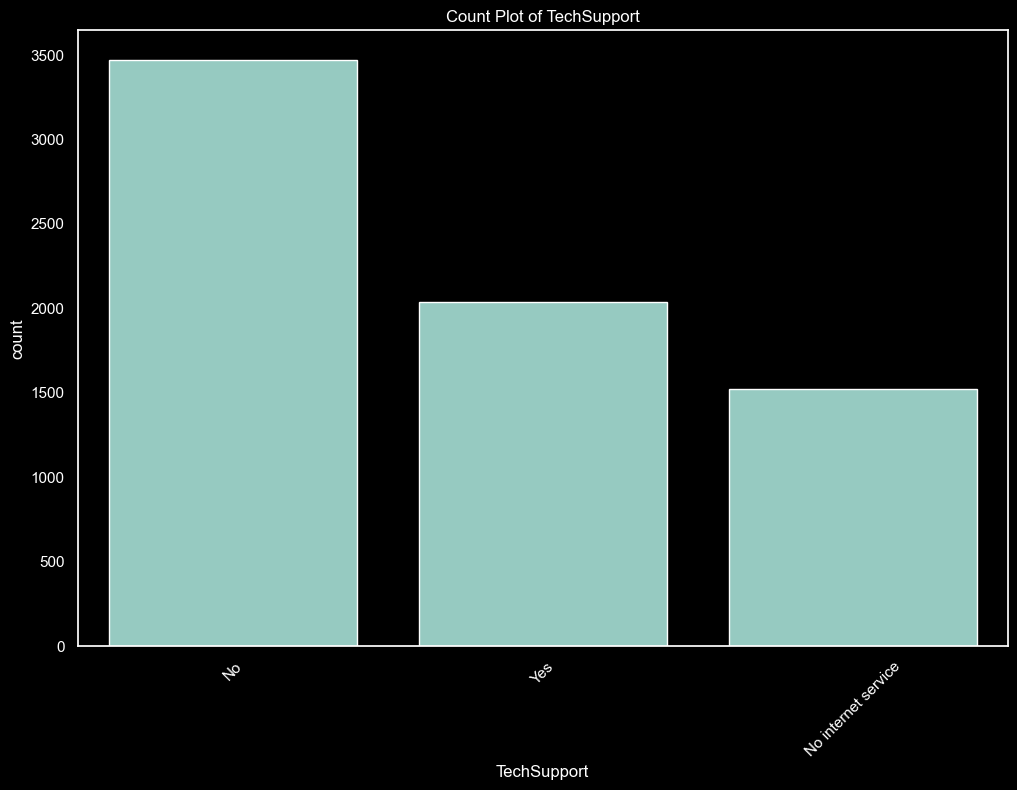

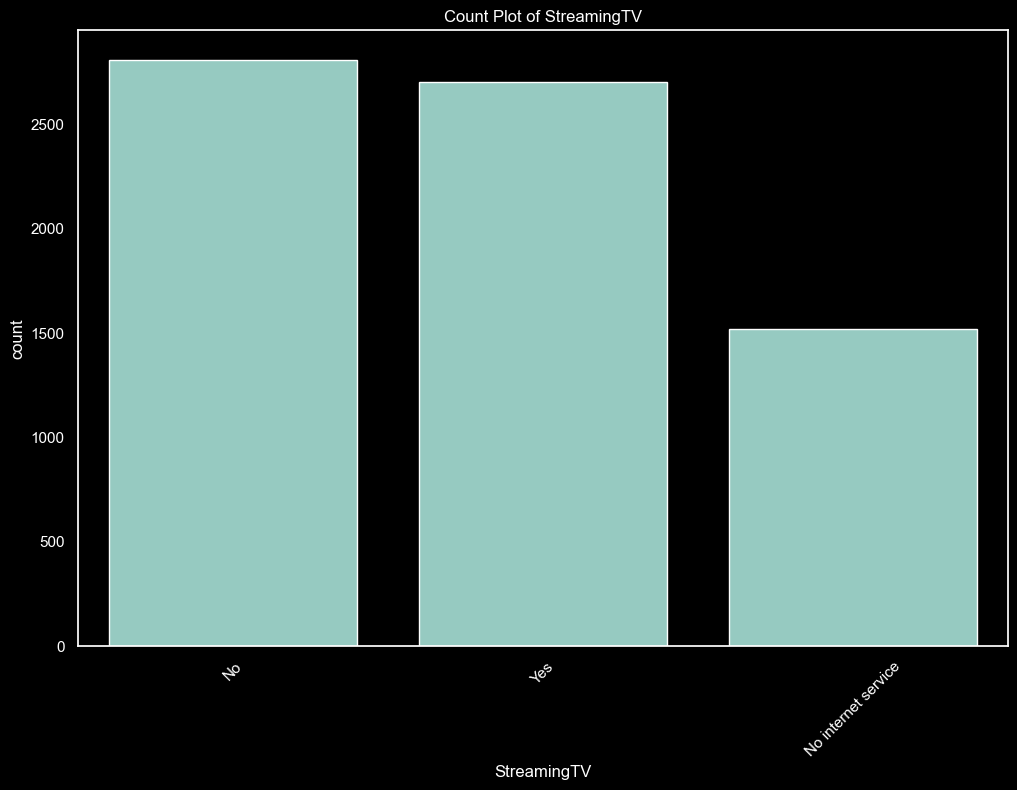

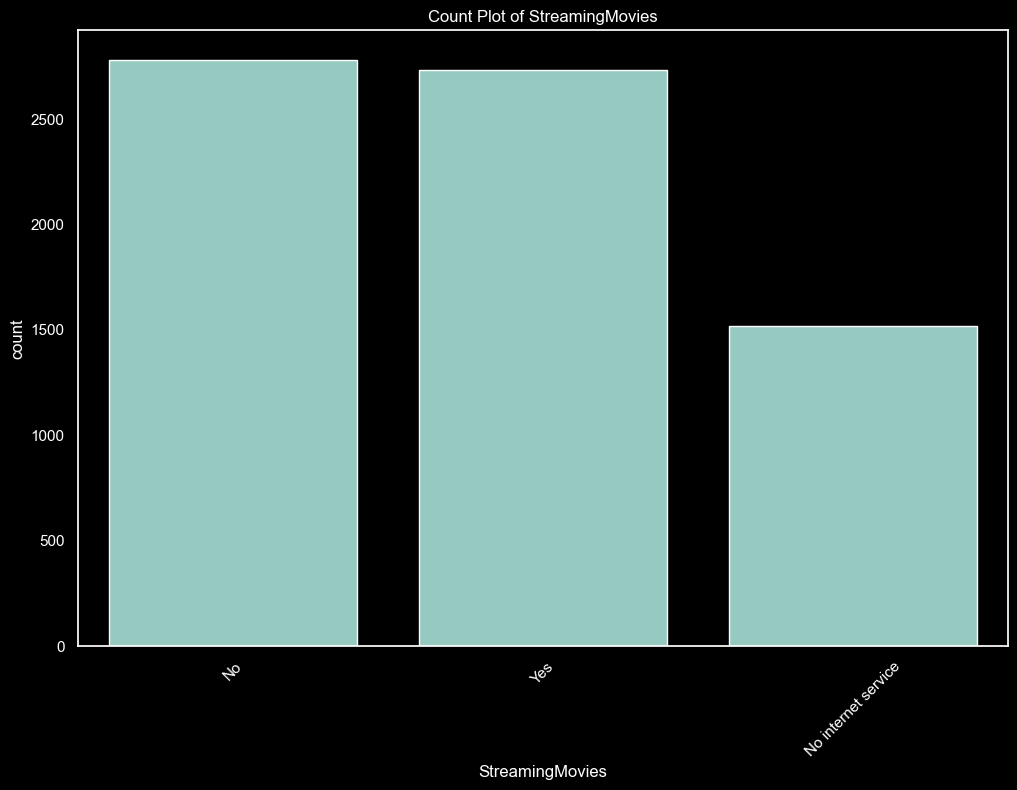

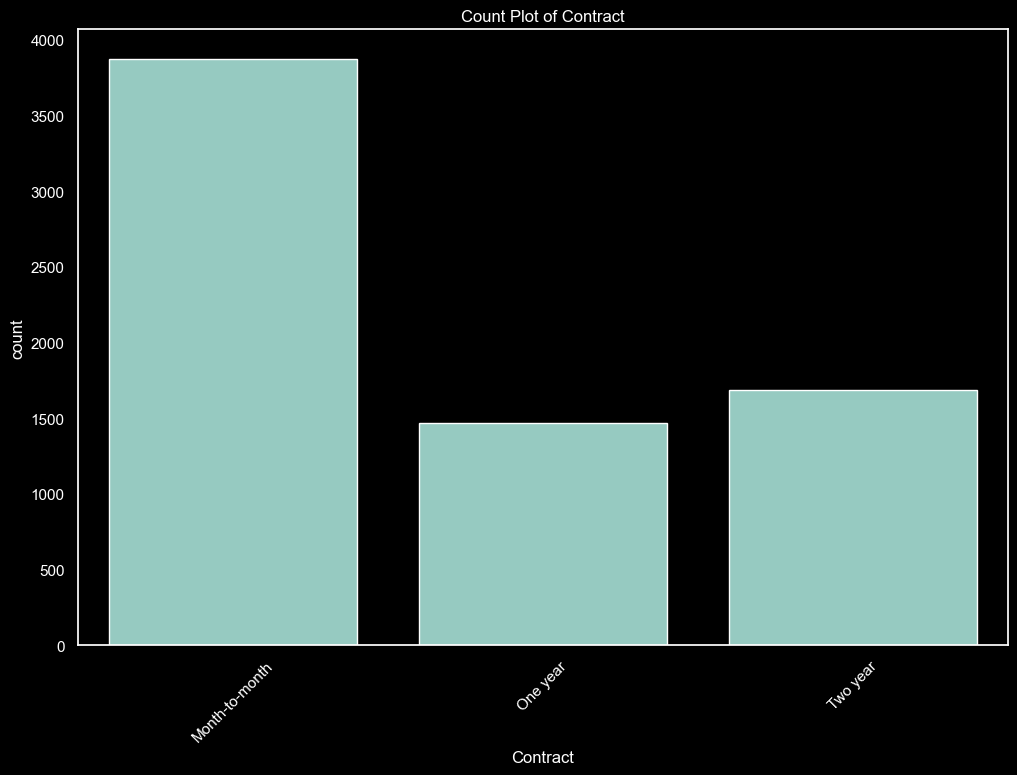

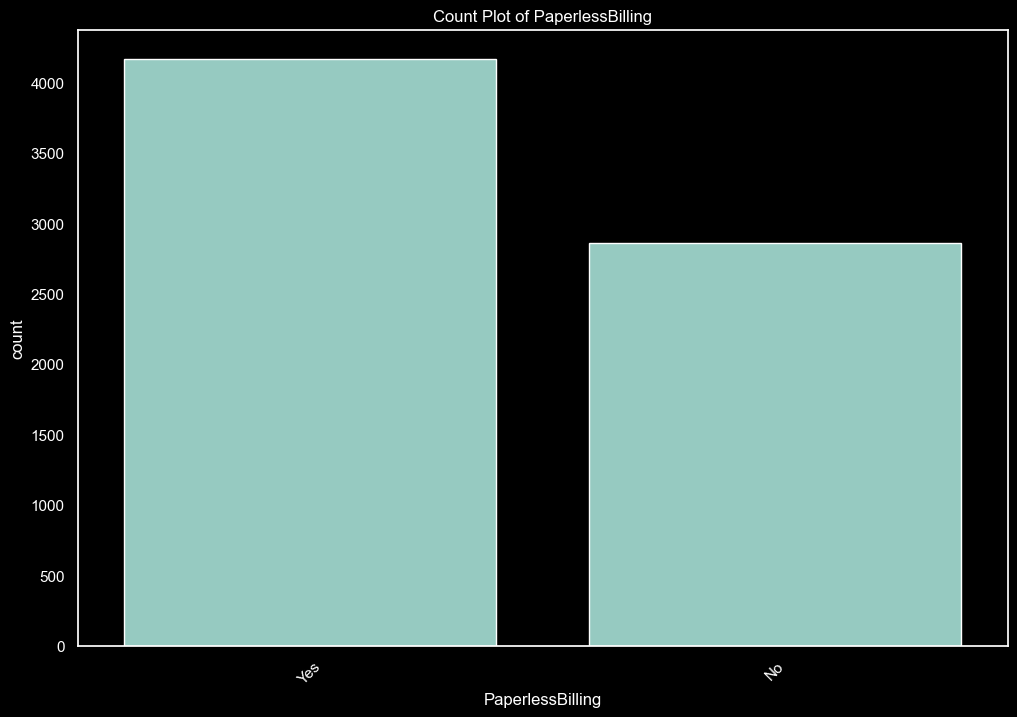

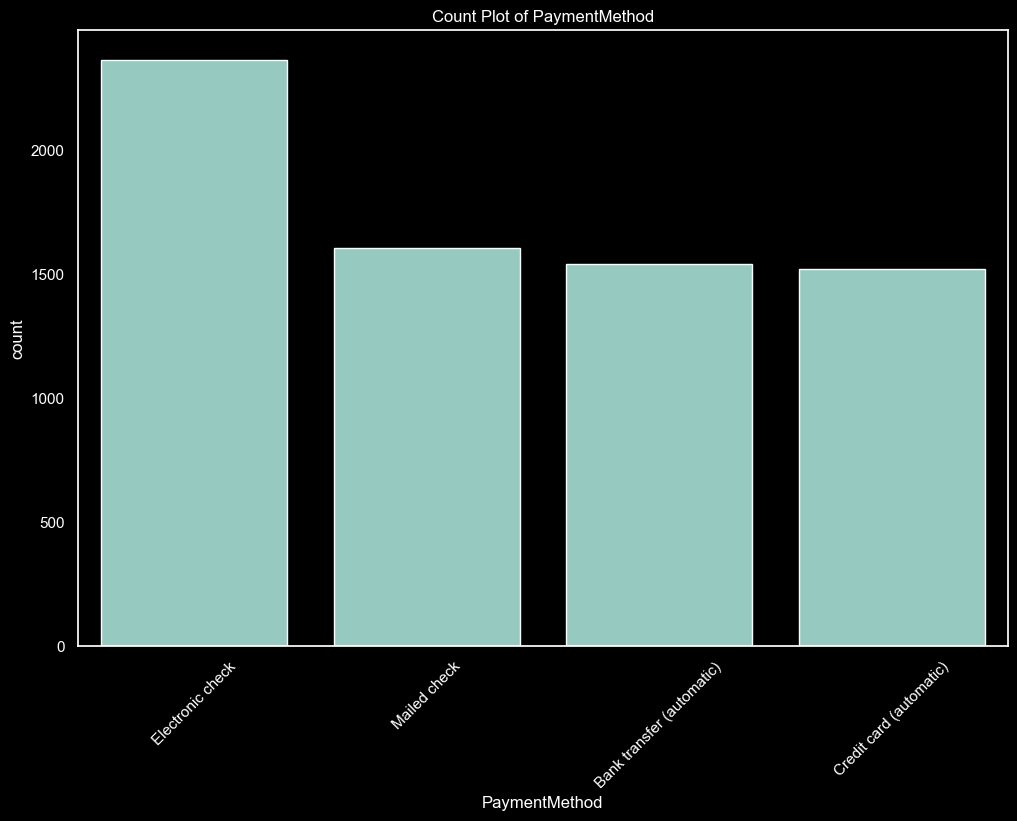

In [44]:
# 4. Count Plots
eda.plot_count_plots(data, categoric_columns)

In [45]:
# 5. Feature-Target Relationships
eda.plot_feature_target_relationships(data, target_col='Churn', numerical_cols=numeric_columns, categorical_cols=categoric_columns)

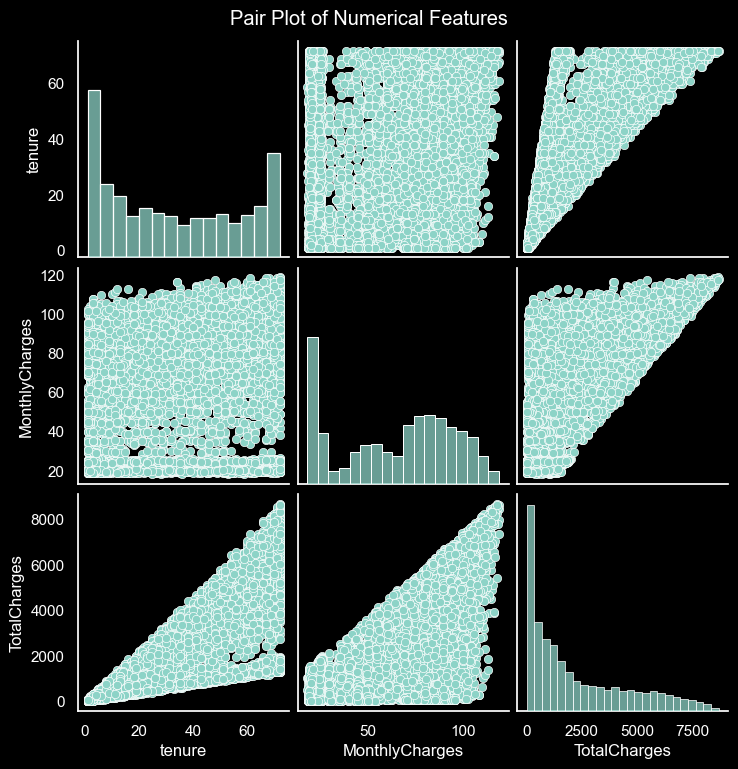

In [46]:
# 6. Pair Plot
eda.plot_pair_plot(data, numeric_columns)

### 4. Feature Engineering

In [47]:
# Create additional features that might be useful for analysis
data['AverageMonthlySpend'] = (data['TotalCharges'] / data['tenure']).replace(0, 1).round(2).astype(float)

### 5. Feature Selection

In [49]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif

def preselect_features(data, target_col='Churn', cardinality_threshold=50, mi_threshold=0.02):
    """
    Filters raw features by:
    - Removing low-variance numeric features
    - Dropping high-cardinality categorical features
    - Filtering by mutual information (after temporary encoding)
    
    Returns:
        filtered_data (pd.DataFrame): DataFrame with selected features
        removed_features (dict): Summary of dropped features
    """
    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    removed = {
        'low_variance_numerical': [],
        'high_cardinality_categorical': [],
        'low_mutual_info': []
    }
    
    # --- 1. Low-variance numerical removal
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if num_cols:
        vt = VarianceThreshold(threshold=0.01)
        vt.fit(X[num_cols])
        kept_num_cols = np.array(num_cols)[vt.get_support()].tolist()
        removed['low_variance_numerical'] = list(set(num_cols) - set(kept_num_cols))
    else:
        kept_num_cols = []
    
    X_num = X[kept_num_cols]

    # --- 2. High-cardinality categorical removal
    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    kept_cat_cols = [col for col in cat_cols if X[col].nunique() <= cardinality_threshold]
    removed['high_cardinality_categorical'] = list(set(cat_cols) - set(kept_cat_cols))
    
    X_cat = X[kept_cat_cols]

    # --- 3. MI filtering (on encoded copy)
    X_temp = pd.concat([X_num, X_cat], axis=1)
    X_encoded_temp = pd.get_dummies(X_temp, drop_first=True)

    mi_scores = mutual_info_classif(X_encoded_temp, y, discrete_features='auto')
    mi_series = pd.Series(mi_scores, index=X_encoded_temp.columns)
    selected_features_encoded = mi_series[mi_series > mi_threshold].index.tolist()
    dropped_mi = mi_series[mi_series <= mi_threshold].index.tolist()

    # Map encoded feature names back to original column names
    original_encoded_features = set()
    for feat in selected_features_encoded:
        if '_' in feat:
            original_encoded_features.add(feat.split('_')[0])
        else:
            original_encoded_features.add(feat)

    dropped_mi_features = set()
    for feat in dropped_mi:
        if '_' in feat:
            dropped_mi_features.add(feat.split('_')[0])
        else:
            dropped_mi_features.add(feat)

    # Final selected raw columns
    selected_raw_features = list(original_encoded_features & set(X_temp.columns))
    removed['low_mutual_info'] = list((set(X_temp.columns) - set(selected_raw_features)))

    # Build final DataFrame
    filtered_data = data[selected_raw_features + [target_col]]

    print(f"\n✅ Feature preselection complete. Retained {len(selected_raw_features)} / {len(X.columns)} raw features.")
    return filtered_data, removed


In [50]:
filtered_data, removed_features = preselect_features(data, target_col='Churn')

# Inspect what was dropped
print("Dropped due to low variance:", removed_features['low_variance_numerical'])
print("Dropped due to high cardinality:", removed_features['high_cardinality_categorical'])
print("Dropped due to low MI:", removed_features['low_mutual_info'])


✅ Feature preselection complete. Retained 13 / 20 raw features.
Dropped due to low variance: []
Dropped due to high cardinality: []
Dropped due to low MI: ['gender', 'Dependents', 'MultipleLines', 'PaperlessBilling', 'SeniorCitizen', 'Partner', 'PhoneService']


### 5. Modelling

## Testing Prior To any Sampling

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE


def get_feature_importance(model, feature_names):
    if hasattr(model, 'coef_'):
        importance = np.abs(model.coef_[0])
    elif hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    else:
        return None

    if len(importance) != len(feature_names):
        raise ValueError("Mismatch in lengths between importance and feature names")

    return pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)


def run_churn_pipeline_with_cv(data, target_col='Churn', random_state=42):
    X = data.drop(columns=[target_col])
    y = data[target_col]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=random_state
    )

    # Column types
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

    # Preprocessor
    preprocessor = ColumnTransformer([
        ('num', MinMaxScaler(), num_cols),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols)
    ])

    # Classifiers + hyperparameters
    classifiers = {
        'Random Forest': (RandomForestClassifier(random_state=random_state, class_weight='balanced'), {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10],
            'classifier__min_samples_split': [2, 5],
            'classifier__min_samples_leaf': [1, 2],
            'classifier__bootstrap': [True, False]
        }),
        'Logistic Regression': (LogisticRegression(max_iter=1000, random_state=random_state), {
            'classifier__C': [0.1, 1],
            'classifier__penalty': ['l1', 'l2'],
            'classifier__solver': ['liblinear', 'saga']
        }),
        'SVM': (SVC(probability=True, random_state=random_state), {
            'classifier__C': [1, 10],
            'classifier__kernel': ['rbf', 'linear'],
            'classifier__gamma': ['scale', 'auto']
        }),
        'XGBoost': (XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', use_label_encoder=False, random_state=random_state), {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [3, 6],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__subsample': [0.8, 1.0],
            'classifier__colsample_bytree': [0.8, 1.0]
        }),
        'LightGBM': (LGBMClassifier(random_state=random_state, class_weight='balanced'), {
            'classifier__n_estimators': [100, 200],
            'classifier__num_leaves': [31, 50],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [-1, 10]
        })
    }

    use_smote = {
        'Logistic Regression': True,
        'SVM': True,
        'Random Forest': True,
        'XGBoost': True,
        'LightGBM': True,
    }

    results = []
    feature_importances = {}
    best_model_name = None
    best_score = 0
    best_pipeline = None

    for name, (model, param_grid) in classifiers.items():
        print(f"\nTraining {name}...")

        steps = [('preprocessor', preprocessor)]
        if use_smote[name]:
            steps.append(('smote', SMOTE(random_state=random_state)))
        steps.append(('classifier', model))

        pipeline = ImbPipeline(steps)
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
        print(f"K- Fold processed")

        grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='average_precision')
        grid.fit(X_train, y_train)
        print(f"Best parameters for {name}: {grid.best_params_}")

        best_pipeline_model = grid.best_estimator_
        y_pred = best_pipeline_model.predict(X_test)
        y_prob = best_pipeline_model.predict_proba(X_test)[:, 1]

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc_auc = roc_auc_score(y_test, y_prob)

        # Precision-Recall AUC
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
        pr_auc = auc(recall_vals, precision_vals)

        print(f"Metrics Evaluated")

        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'PR-AUC': pr_auc
        })

        if roc_auc > best_score:
            best_score = roc_auc
            best_model_name = name
            best_pipeline = best_pipeline_model

        # Print classification report and confusion matrix
        print(f"\nClassification Report for {name}:\n")
        print(classification_report(y_test, y_pred, target_names=['Not Churn', 'Churn']))
        print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}")

        try:
            preprocessor_fitted = best_pipeline.named_steps['preprocessor']
            num_feats = preprocessor_fitted.named_transformers_['num'].get_feature_names_out(num_cols)
            cat_feats = preprocessor_fitted.named_transformers_['cat'].get_feature_names_out(cat_cols)
            all_features = np.concatenate([num_feats, cat_feats])

            importance_df = get_feature_importance(best_pipeline.named_steps['classifier'], all_features)
            if importance_df is not None:
                feature_importances[name] = importance_df
        except Exception as e:
            print(f"Feature importance error for {name}: {e}")

    results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)
    return results_df, best_model_name, best_pipeline, feature_importances


In [55]:
results, best_model_name, best_pipeline, importances = run_churn_pipeline_with_cv(filtered_data, target_col='Churn')
print(results)
print(f"Best model: {best_model_name}")
print(importances.get(best_model_name))


Training Random Forest...
K- Fold processed
Best parameters for Random Forest: {'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Metrics Evaluated

Classification Report for Random Forest:

              precision    recall  f1-score   support

   Not Churn       0.89      0.76      0.82      1033
       Churn       0.53      0.75      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.76      0.77      1407

Confusion Matrix for Random Forest:
[[789 244]
 [ 94 280]]

Training Logistic Regression...
K- Fold processed
Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Metrics Evaluated

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

   Not Churn  

### Final Summary and Conclusion

After evaluating multiple models on the Telco Customer Churn dataset, the following results were obtained:

| Model                 | Accuracy | Precision | Recall | F1-Score | ROC-AUC | PR-AUC |
|-----------------------|----------|-----------|--------|----------|---------|--------|
| LightGBM             | 0.76     | 0.54      | 0.78   | 0.64     | 0.84    | 0.64   |
| XGBoost              | 0.76     | 0.53      | 0.77   | 0.63     | 0.84    | 0.64   |
| Logistic Regression  | 0.73     | 0.50      | 0.80   | 0.62     | 0.83    | 0.61   |
| Random Forest        | 0.76     | 0.53      | 0.75   | 0.62     | 0.83    | 0.63   |
| SVM                  | 0.69     | 0.45      | 0.82   | 0.58     | 0.83    | 0.61   |

#### Key Observations:
1. **Best Performing Models**:
   - **LightGBM** and **XGBoost** achieved the highest overall performance, with an F1-Score of **0.64** and ROC-AUC of **0.84**.
   - These models provide a good balance between precision and recall, making them suitable for churn prediction.

2. **Recall Priority**:
   - Recall is a critical metric for churn prediction, as identifying churners is more important than minimizing false positives. Both LightGBM and XGBoost achieved high recall values of **0.78** and **0.77**, respectively.

3. **Precision Tradeoff**:
   - Precision is slightly lower (around **0.54**), indicating some false positives. This tradeoff is acceptable given the focus on recall.

4. **Logistic Regression**:
   - Logistic Regression performed well with a recall of **0.80**, but its precision (**0.50**) and F1-Score (**0.62**) were slightly lower than LightGBM and XGBoost.

5. **SVM Underperformance**:
   - SVM had the lowest overall performance, with an F1-Score of **0.58** and accuracy of **0.69**. It is not recommended for deployment.

#### Conclusion:
- **LightGBM** is the recommended model for deployment due to its strong performance across all metrics, particularly its high recall and F1-Score.
- The model's ability to identify churners effectively makes it a valuable tool for proactive customer retention strategies.
- Future improvements could focus on optimizing precision further, possibly by fine-tuning the decision threshold or exploring cost-sensitive learning techniques.

This concludes the analysis and modeling for the Telco Customer Churn dataset.